In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()


In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Elbow method to choose value of k**

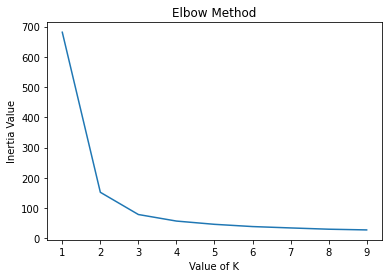

In [ ]:
inertias=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,10),inertias)
plt.xlabel('Value of K')
plt.ylabel('Inertia Value')
plt.title('Elbow Method')
plt.show()

**KMEANS MODEL**

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)
p=kmeans.predict(df)
p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**Visualizing Clusters**

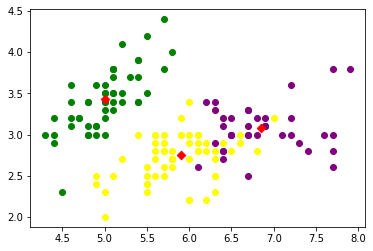

In [ ]:
df['labels']=p
df1=df[df['labels']==0]
df2=df[df['labels']==1]
df3=df[df['labels']==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)' ],color='yellow')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)' ],color='green')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='purple')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='D',color='red')
plt.show()

In [ ]:

df['species']=df.labels.apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,species
0,5.1,3.5,1.4,0.2,1,versicolor
1,4.9,3.0,1.4,0.2,1,versicolor
2,4.7,3.2,1.3,0.2,1,versicolor
3,4.6,3.1,1.5,0.2,1,versicolor
4,5.0,3.6,1.4,0.2,1,versicolor


In [ ]:
df1=df[['labels','species']]
df.drop(['labels','species'],axis=1,inplace=True)
df1.head()

,labels,species
0,1,versicolor
1,1,versicolor
2,1,versicolor
3,1,versicolor
4,1,versicolor


**crosstab**

In [ ]:
ct=pd.crosstab(df1.labels,df1.species)
ct

species,setosa,versicolor,virginica
labels,,,
0,62,0,0
1,0,50,0
2,0,0,38
